# Uniform Sampling
Notebook from https://gitlab.com/csb.ethz/pta/-/blob/main/examples/uniform_sampling.ipynb by Mattia Gollub. Reuse script for all models used in thesis. Might even try iJR904. 

## e_coli_core

In [2]:
import pta
import cobra
import numpy as np
import matplotlib.pyplot as plt
import math
# from python_scripts.functions import*
from functions import*

%matplotlib inline


INFO: No xlwt module available, Excel spreadsheet creation disabled


CBGLPK based on swiglpk: not all methods implimented yet!



No module named 'cplex'



CPLEX not available

*****
Using GLPK
*****

No solver present, unable to create shortcuts


***********************************************************************
* Welcome to CBMPy (0.8.2) - PySCeS Constraint Based Modelling        *
*                http://cbmpy.sourceforge.net                         *
* Copyright(C) Brett G. Olivier 2014 - 2020                           *
* Systems Biology Lab, Vrije Universiteit Amsterdam                   *
* Amsterdam, The Netherlands                                          *
* CBMPy is developed as part of the BeBasic MetaToolKit Project       *
* Distributed under the GNU GPL v 3.0 licence, see                    *
* LICENCE (supplied with this release) for details                    *
***********************************************************************

Since the mpi4py-package is

### Load a SBML model

In [3]:
model = cobra.io.read_sbml_model('models/e_coli_core.xml')

# Open all exchange reactions
bound = 1000
for r in model.boundary:
    r.bounds = bound*np.sign(r.bounds)
    print(r.id, r.bounds)

model.reactions.BIOMASS_Ecoli_core_w_GAM.lower_bound = 1e-4

Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-06
EX_ac_e (0.0, 1000.0)
EX_acald_e (0.0, 1000.0)
EX_akg_e (0.0, 1000.0)
EX_co2_e (-1000.0, 1000.0)
EX_etoh_e (0.0, 1000.0)
EX_for_e (0.0, 1000.0)
EX_fru_e (0.0, 1000.0)
EX_fum_e (0.0, 1000.0)
EX_glc__D_e (-1000.0, 1000.0)
EX_gln__L_e (0.0, 1000.0)
EX_glu__L_e (0.0, 1000.0)
EX_h_e (-1000.0, 1000.0)
EX_h2o_e (-1000.0, 1000.0)
EX_lac__D_e (0.0, 1000.0)
EX_mal__L_e (0.0, 1000.0)
EX_nh4_e (-1000.0, 1000.0)
EX_o2_e (-1000.0, 1000.0)
EX_pi_e (-1000.0, 1000.0)
EX_pyr_e (0.0, 1000.0)
EX_succ_e (0.0, 1000.0)


### Run uniform sampling on the model

In [4]:
us_model = pta.UniformSamplingModel.from_cobrapy_model(model)
result = pta.sample_flux_space_uniform(us_model, 100000)
assert result.check_convergence()


Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
-----------------

In [5]:
# Write results
result.samples.to_csv('results/flux_samples/flux_samples_e_coli_core.csv')

### Plot the predicted distributions

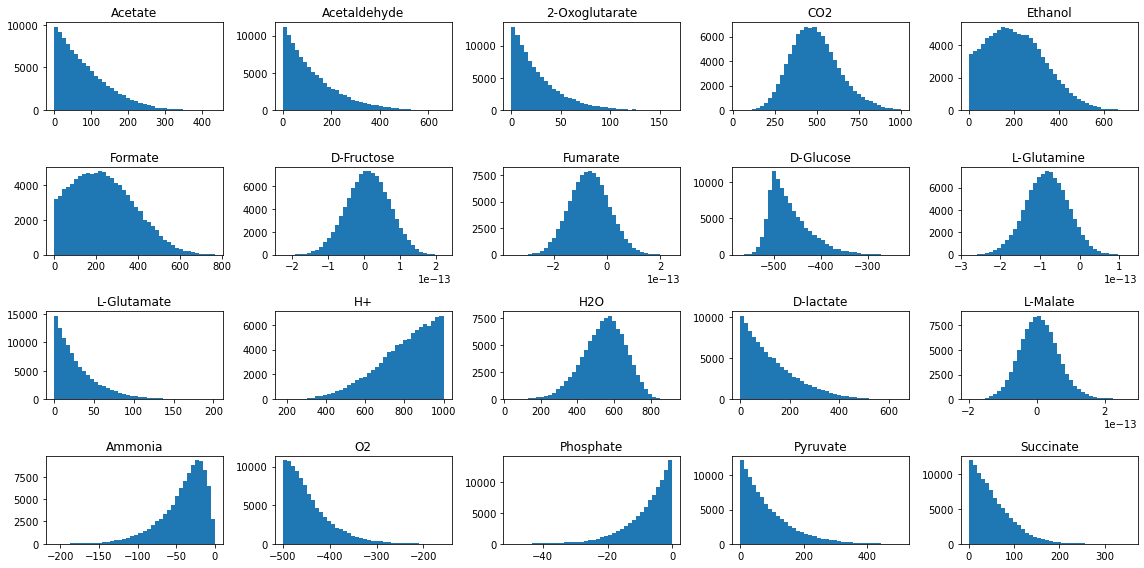

In [6]:
exchanges = [r for r in result.samples.columns if r.startswith('EX_')]
num_rxns = len(exchanges)
n_cols = 5
n_rows = math.ceil(num_rxns / n_cols)

fig=plt.figure(figsize=(16, 2*n_rows))
# Plot only exchange reactions with model.reactions.name as title and not density scaled values on y-axis.
for i, ex in zip(range(num_rxns), exchanges):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    ax.hist(result.samples[ex], bins=40, density=False)
    ax.set_title(model.reactions.get_by_id(ex).name.replace(' exchange', ''))
fig.tight_layout()
# plt.savefig('results/figures/uniform_sampling/us_ecolic.png', bbox_inches='tight')
plt.show()

## iIT341

### Load SBML model

In [7]:
model = cobra.io.read_sbml_model('models/iIT341_ecm_minII.xml')

In [8]:
# Open all exchange reactions
bound = 1000
for r in model.boundary:
    r.bounds = bound*np.sign(r.bounds)
    print(r.id, r.bounds)

model.reactions.BIOMASS_HP_published.lower_bound = 1e-4

EX_pime_e (-1000.0, 0.0)
EX_phe__L_e (0.0, 1000.0)
EX_pheme_e (0.0, 1000.0)
EX_pi_e (-1000.0, 0.0)
EX_fe2_e (-1000.0, 0.0)
EX_fe3_e (-1000.0, 0.0)
EX_for_e (0.0, 1000.0)
EX_fum_e (0.0, 1000.0)
EX_gal_e (0.0, 1000.0)
EX_glc__D_e (-1000.0, 0.0)
EX_gln__L_e (0.0, 1000.0)
EX_glu__L_e (0.0, 1000.0)
EX_gly_e (0.0, 1000.0)
EX_gsn_e (0.0, 1000.0)
EX_gua_e (0.0, 1000.0)
EX_h2_e (0.0, 1000.0)
EX_h2co3_e (0.0, 1000.0)
EX_h2o_e (-1000.0, 1000.0)
EX_h_e (-1000.0, 0.0)
EX_his__L_e (-1000.0, 0.0)
EX_hxan_e (0.0, 1000.0)
EX_ile__L_e (-1000.0, 0.0)
EX_lac__L_e (0.0, 1000.0)
EX_leu__L_e (-1000.0, 0.0)
EX_lys__L_e (0.0, 1000.0)
EX_mal__L_e (0.0, 1000.0)
EX_met__L_e (-1000.0, 0.0)
EX_na1_e (0.0, 1000.0)
EX_nh4_e (0.0, 1000.0)
EX_ni2_e (0.0, 1000.0)
EX_nmn_e (0.0, 1000.0)
EX_no2_e (0.0, 1000.0)
EX_no3_e (0.0, 1000.0)
EX_no_e (0.0, 1000.0)
EX_o2_e (-1000.0, 0.0)
EX_orn_e (0.0, 1000.0)
EX_orot_e (0.0, 1000.0)
EX_pro__L_e (0.0, 1000.0)
EX_pyr_e (0.0, 1000.0)
DM_hmfurn_c (0.0, 1000.0)
EX_ser__D_e (0.0, 1000.0)

### Uniform sampling

In [9]:
us_model = pta.UniformSamplingModel.from_cobrapy_model(model)
result = pta.sample_flux_space_uniform(us_model, 100000)
assert result.check_convergence()


Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
-----------------

In [10]:
# Write results
result.samples.to_csv('results/flux_samples/flux_samples_iIT341.csv')

## Spring microbes

### Load model

In [13]:
model = cobra.io.read_sbml_model('models/spring_microbes/fap_srb_syn.xml')

In [14]:
# Open all exchange reactions
bound = 1000
for r in model.boundary:
    r.bounds = bound*np.sign(r.bounds)
    print(r.id, r.bounds)

DM_ATPex_fap (0.0, 1000.0)
SK_hv_gen_fap (-1000.0, 0.0)
DM_PHB_fap (0.0, 1000.0)
DM_ATPex_srb (0.0, 1000.0)
DM_polyglcex_gen_syn (0.0, 1000.0)
DM_ATPex_syn (0.0, 1000.0)
SK_hv_gen_syn (-1000.0, 0.0)
DM_glyox_syn (0.0, 1000.0)
SK_NH3_syn (-1000.0, 0.0)
EX_CO2ex_gen (-1000.0, 1000.0)
EX_H2pool_gen (-1000.0, 1000.0)
EX_O2expool_gen (-1000.0, 1000.0)
EX_SO4ex_gen (-1000.0, 1000.0)
EX_H2Sex_gen (-1000.0, 1000.0)
DM_bm_fap_srb_syn (0.0, 1000.0)


In [16]:
# Force production of biomass on all microbes
model.reactions.get_by_id('DM_bm_fap_srb_syn').lower_bound = 1e-4

### Uniform sampling

In [17]:
us_model = pta.UniformSamplingModel.from_cobrapy_model(model)
result = pta.sample_flux_space_uniform(us_model, 100000)
assert result.check_convergence()


Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
-----------------

In [18]:
result.samples.to_csv('results/flux_samples/flux_samples_srbfapsyn.csv')

## iJR904

### Load model

In [19]:
model = cobra.io.read_sbml_model('models/iJR904_ecm.xml')

### Uniform sampling

In [20]:
us_model = pta.UniformSamplingModel.from_cobrapy_model(model)
result = pta.sample_flux_space_uniform(us_model, 100000)
assert result.check_convergence()

model in infeasible state, resetting lp

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |     steps |   steps/s  
------------------------------------------------

Starting simulation ...
------------------------------------------------
    worker |  time (s) |  